# importing Libraries.

In [96]:
#importing Libraries.
import pandas as pd #for data manupulation or analysis
import numpy as np # for mumeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# import dataset 

In [97]:
#import the dataframe as dataset.
dataset=pd.read_csv('Social_Network_Ads.csv')

In [98]:
#reading dataset
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Exploratory data analysis 

In [99]:
dataset.shape

(400, 5)

In [100]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [101]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [102]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [103]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Data visualization

<AxesSubplot:>

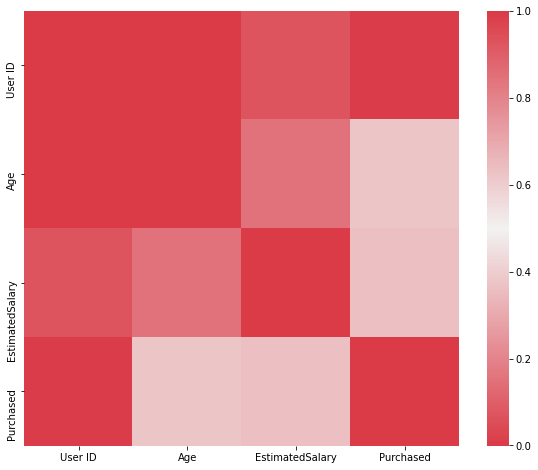

In [114]:
# correlation plot

f, ax = plt.subplots(figsize = (10, 8))

corr = dataset.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(10, 10, as_cmap = True), square = True, ax = ax)

In [104]:
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
print(x.shape)
print(y.shape)

(400, 2)
(400,)


In [105]:
#Gender data  
#for Gender Variable  
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
x[:, 1]= label_encoder_x.fit_transform(x[:, 1])  

In [106]:
#for Gender Variable  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
label_encoder_x= LabelEncoder()  
x[:, 1]= label_encoder_x.fit_transform(x[:, 1])

#Encoding for dummy variables  
onehot_encoder= OneHotEncoder()    
x= onehot_encoder.fit_transform(x).toarray()  
print(x)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [107]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [108]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, 
                criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [109]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9100


In [110]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[63  5]
 [ 4 28]]


In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


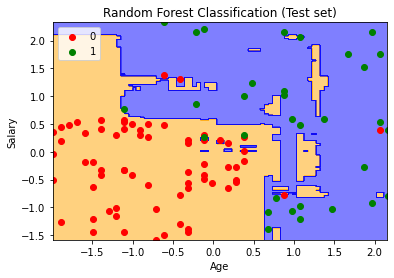

In [112]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
 
aranged_ages = np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_salaries = np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show() 


In this project, I build a Random Forest Classifier to predict the customer will purchased product or not.The explanatory and target variables are being defined.
The train test split function is used for predictors and target.The ratio is set 60% for training sample and 40% for test sample.The accuracy score as per the random forest model is 91%% of the sample correctly.I have used the Random Forest model to find only the important features, 
build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is age.
